In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import softmax
from toolkit import *

In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,0,13.05,0.40,2.40,21.68,71.79,2.33,1.87,0.09,1.30,1.070000,1.13,2.45,96.79,1
1,1,13.01,3.66,2.21,16.53,98.87,2.46,2.34,0.28,1.49,3.690000,0.75,2.79,588.86,0
2,2,13.13,1.14,2.32,18.75,108.51,2.63,2.26,0.13,2.15,5.030000,0.86,2.66,954.80,0
3,3,12.06,1.41,2.04,16.58,73.52,0.84,-0.36,0.37,0.14,7.869999,0.37,1.01,194.88,2
4,4,12.35,1.14,1.91,19.52,77.65,2.09,1.98,0.27,1.03,4.620000,1.11,3.46,502.23,1


In [3]:
df.drop('id', axis=1, inplace=True)

In [4]:
from sklearn.model_selection import train_test_split

features, labels = df.drop('target', axis=1), df['target']

x_train, x_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.15
)

In [5]:
x_train, y_train = x_train.values, y_train.values

In [6]:
normalizers = x_train.mean(axis=0)
x_train /= normalizers

In [7]:
shapes = softmax(x_train)

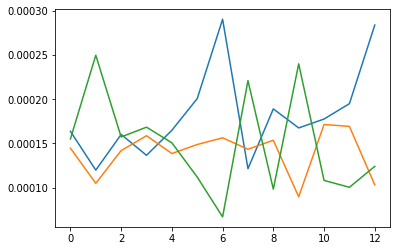

In [8]:
for group in range(3):
    ids = np.where(y_train == group)
    table = shapes[ids]
    graph = np.median(table, axis=0)
    plt.plot(graph)
plt.show()

In [9]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
cluster = kmeans.fit_predict(shapes)

In [10]:
repdict, acc = replace_dict(cluster, y_train)
acc

0.7615894039735099

In [11]:
def predict_df(df):
    feat = df.values
    feat /= normalizers
    shapes = softmax(feat)
    return replace(
        kmeans.predict(shapes),
        repdict
    )

In [12]:
pred = predict_df(x_test)

accuracy(pred, y_test.values)

0.5185185185185185